[View in Colaboratory](https://colab.research.google.com/github/nikhilsingh291/eip_theinkers/blob/master/NIKHIL_BATCH_3_ASSIGNMENT4A.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


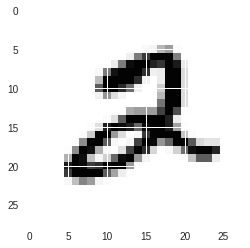

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 10)          16910     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 17,560
Trainable params: 17,560
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.3283 - acc: 0.9064
Epoch 2/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.1103 - acc: 0.9676
Epoch 3/20
 5760/60000 [=>............................] - ETA: 16s - loss: 0.0887 - acc: 0.9724

60000/60000 [==============================] - 19s 312us/step - loss: 0.0775 - acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.0642 - acc: 0.9809
Epoch 5/20
11968/60000 [====>.........................] - ETA: 14s - loss: 0.0564 - acc: 0.9825

60000/60000 [==============================] - 19s 315us/step - loss: 0.0561 - acc: 0.9826
Epoch 6/20
60000/60000 [==============================] - 18s 308us/step - loss: 0.0502 - acc: 0.9848
Epoch 7/20
13056/60000 [=====>........................] - ETA: 14s - loss: 0.0439 - acc: 0.9877

60000/60000 [==============================] - 18s 305us/step - loss: 0.0456 - acc: 0.9867
Epoch 8/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0401 - acc: 0.9879
Epoch 9/20
15104/60000 [======>.......................] - ETA: 13s - loss: 0.0332 - acc: 0.9892

60000/60000 [==============================] - 22s 368us/step - loss: 0.0370 - acc: 0.9887
Epoch 10/20
60000/60000 [==============================] - 18s 303us/step - loss: 0.0335 - acc: 0.9896
Epoch 11/20
11712/60000 [====>.........................] - ETA: 14s - loss: 0.0268 - acc: 0.9915

60000/60000 [==============================] - 18s 300us/step - loss: 0.0306 - acc: 0.9906
Epoch 12/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.0281 - acc: 0.9911
Epoch 13/20
11328/60000 [====>.........................] - ETA: 15s - loss: 0.0242 - acc: 0.9922

60000/60000 [==============================] - 18s 306us/step - loss: 0.0258 - acc: 0.9919
Epoch 14/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0238 - acc: 0.9926
Epoch 15/20
12352/60000 [=====>........................] - ETA: 14s - loss: 0.0186 - acc: 0.9945

60000/60000 [==============================] - 19s 317us/step - loss: 0.0216 - acc: 0.9929
Epoch 16/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0193 - acc: 0.9940
Epoch 17/20
11904/60000 [====>.........................] - ETA: 15s - loss: 0.0157 - acc: 0.9946

60000/60000 [==============================] - 19s 313us/step - loss: 0.0176 - acc: 0.9941
Epoch 18/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.0167 - acc: 0.9948
Epoch 19/20
11520/60000 [====>.........................] - ETA: 16s - loss: 0.0127 - acc: 0.9964

60000/60000 [==============================] - 19s 319us/step - loss: 0.0156 - acc: 0.9949
Epoch 20/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.0145 - acc: 0.9955


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [33]:
print(score)

[0.06947491778358818, 0.9823]


In [0]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred[:9])
print(y_test[:9])

[[2.01569564e-18 1.22274404e-11 5.76731046e-13 1.12882939e-08
  2.57796886e-16 1.00895044e-16 1.04033805e-25 1.00000000e+00
  2.40275872e-11 1.72496822e-10]
 [2.58218069e-09 6.92941815e-11 9.99988556e-01 4.10531548e-12
  6.40184833e-22 9.77866876e-14 1.14765571e-05 2.85351735e-17
  1.96285848e-12 4.04335651e-16]
 [2.99218854e-08 9.99179184e-01 1.81162359e-05 9.82479165e-08
  7.34162109e-04 2.36293696e-09 6.17774916e-08 4.00639583e-05
  2.82407964e-05 1.19213937e-08]
 [9.99997377e-01 2.33473908e-14 3.70652131e-08 1.74947716e-13
  8.77023985e-13 2.28263182e-13 2.67696078e-06 3.69306365e-12
  5.99670105e-11 5.81191128e-12]
 [2.07311839e-14 1.05038025e-15 9.07632480e-15 2.03676309e-13
  9.99999881e-01 5.02719534e-19 9.51554482e-13 6.85282235e-13
  1.55058755e-09 1.14832666e-07]
 [5.24979574e-11 9.96476948e-01 5.49697745e-07 9.95973082e-09
  3.46767774e-05 1.38089637e-10 5.81666104e-11 3.48609057e-03
  1.54028839e-06 9.00070347e-08]
 [1.35177750e-16 9.14513352e-14 2.79441337e-09 1.42034466e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

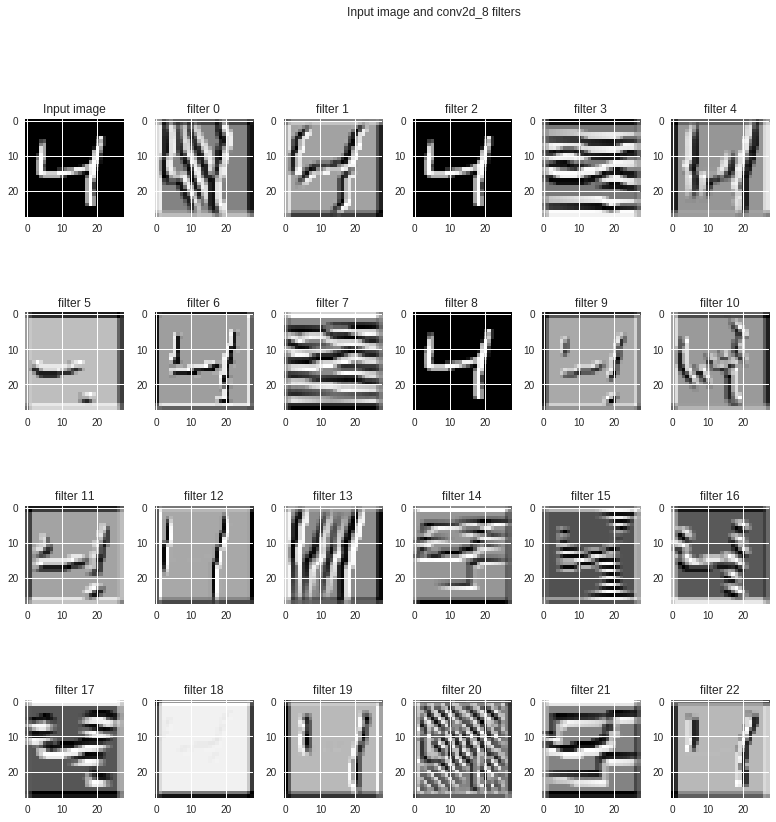

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()